In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd

import seaborn as sns

In [13]:
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')[['Hair length','Shoe size','Sex']].dropna()
df_test=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')[['Hair length','Shoe size','Sex']].dropna()

In [14]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hair length  186 non-null    float64
 1   Shoe size    186 non-null    int64  
 2   Sex          186 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


<AxesSubplot: xlabel='Hair length', ylabel='Shoe size'>

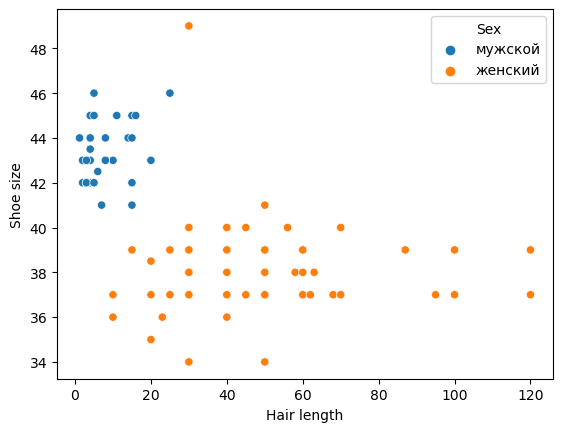

In [17]:
sns.scatterplot(data=df_test,x='Hair length',y='Shoe size',hue='Sex')

Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Пронормируйте признаки 'Hair length','Shoe size' используя StandardScaler

Запустите модель SGDClassifier(random_state=0) (нужно написать фразу random_state=0, чтобы у всех обучающихся был одинаковый ответ), и получите предсказания для студентов из тестовой выборки students_test.csv

С помощью команды pd.crosstab постройте матрицу ошибок (таблицу сопряженности) предсказанного и истинного пола студентов.

В отчет запишите количество студентов мужского пола, которые были детектированы как мужчины

In [21]:
model = SGDClassifier(random_state=0)
scaler=StandardScaler()
scaler.fit(df[['Hair length','Shoe size']].values.reshape(-1,2))
arr=scaler.transform(df[['Hair length','Shoe size']].values.reshape(-1,2))
arr_test=scaler.transform(df_test[['Hair length','Shoe size']].values.reshape(-1,2))

In [25]:
model.fit(arr,df['Sex'])
df_test['Predicted']=model.predict(arr_test)
pd.crosstab(df_test['Predicted'],df_test['Sex'])

Sex,женский,мужской
Predicted,,
женский,61,1
мужской,1,35
